Symbolic computation
====================

SymPy
-----

In this section, we introduce some basic functionality of the SymPy (SYMbolic Python) library. In contrast to numerical computation (involving numbers), in symbolic calculation we are processing and transforming generic variables.

The SymPy home page is <http://sympy.org/>, and provides the full (and up-to-date) documentation for this library.

Symbolic calculation is very slow compared to floating point operation (see for example [symbolic calculation for decimals](13-numeric-computation.ipynb#Symbolic-calculation)), and thus generally not for direct simulation. However, it is a powerful tool to support the preparation of code and symbolic work. Occasionally, we use symbolic operations in simulations to work out the most efficient numerical code, before that is executed.

### Output

Before we start using sympy, we'll call `init_printing`. This tells sympy to display expressions in a nicer format.

In [1]:
import sympy
sympy.init_printing()

### Symbols

Before we can carry out any symbolic operations, we need to create symbolic variables using SymPy’s `Symbol` function:

In [2]:
from sympy import Symbol
x = Symbol('x')
type(x)

sympy.core.symbol.Symbol

In [3]:
y = Symbol('y')
2 * x - x

In [4]:
x + y + x + 10*y

In [5]:
y + x - y + 10

We can abbreviate the creation of multiple symbolic variables using the `symbols` function. For example, to create the symbolic variables `x`, `y` and `z`, we can use

In [6]:
import sympy
x, y, z = sympy.symbols('x,y,z')
x + 2*y + 3*z - x

Once we have completed our term manipulation, we sometimes like to insert numbers for variables. This can be done using the `subs` method.

In [7]:
from sympy import symbols
x, y = symbols('x,y')
x + 2*y

In [8]:
x + 2*y.subs(x, 10)

In [9]:
(x + 2*y).subs(x, 10)

In [10]:
(x + 2*y).subs(x, 10).subs(y, 3)

In [11]:
(x + 2*y).subs({x:10, y:3})

We can also substitute a symbolic variable for another one such as in this example where `y` is replaced with `x` before we substitute `x` with the number `2`.

In [12]:
myterm = 3*x + y**2
myterm

In [13]:
myterm.subs(x, y)

In [14]:
myterm.subs(x, y).subs(y, 2)

From this point onward, some of the code fragments and examples we present will assume that the required symbols have already been defined. If you try an example and SymPy gives a message like `NameError: name ’x’ is not defined` it is probably because you need to define the symbol using one of the methods above.

### isympy

The `isympy` executable is a wrapper around ipython which creates the symbolic (real) variables `x`, `y` and `z`, the symbolic integer variables `k`, `m` and `n` and the symbolic function variables `f`, `g` and `h`, and imports all objects from the SymPy toplevel.

This is convenient to figure out new features or experimenting interactively

    $> isympy
    Python 2.6.5 console for SymPy 0.6.7

    These commands were executed:
    >>> from __future__ import division
    >>> from sympy import *
    >>> x, y, z = symbols('xyz')
    >>> k, m, n = symbols('kmn', integer=True)
    >>> f, g, h = map(Function, 'fgh')

    Documentation can be found at http://sympy.org/

    In [1]: 

### Numeric types

SymPy has the numeric types `Rational` and `RealNumber`. The Rational class represents a rational number as a pair of two integers: the numerator and the denominator, so `Rational(1,2)` represents `1/2`, `Rational(5,2)` represents `5/2` and so on.

In [15]:
from sympy import Rational

In [16]:
a = Rational(1, 10)
a

In [17]:
b = Rational(45, 67)
b

In [18]:
a * b

In [19]:
a - b

In [20]:
a + b

Note that the Rational class works with rational expressions *exactly*. This is in contrast to Python’s standard `float` data type which uses floating point representation to *approximate* (rational) numbers.

We can convert the `sympy.Rational` type into a Python floating point variable using `float` or the `evalf` method of the Rational object. The `evalf` method can take an argument that specifies how many digits should be computed for the floating point approximation (not all of those may be used by Python’s floating point type of course).

In [21]:
c = Rational(2, 3)
c

In [22]:
float(c)

In [23]:
c.evalf()

In [24]:
c.evalf(50)

### Differentiation and Integration

SymPy is capable of carrying out differentiation and integration of many functions:

In [25]:
from sympy import Symbol, exp, sin, sqrt, diff
x = Symbol('x')
y = Symbol('y')
diff(sin(x), x)

In [26]:
diff(sin(x), y)

In [27]:
diff(10 + 3*x + 4*y + 10*x**2 + x**9, x)

In [28]:
diff(10 + 3*x + 4*y + 10*x**2 + x**9, y)

In [29]:
diff(10 + 3*x + 4*y + 10*x**2 + x**9, x).subs(x,1)

In [30]:
diff(10 + 3*x + 4*y + 10*x**2 + x**9, x).subs(x,1.5)

In [31]:
diff(exp(x), x)

In [32]:
diff(exp(-x ** 2 / 2), x)

The SymPy `diff()` function takes a minimum of two arguments: the function to be differentiated and the variable with respect to which the differentiation is performed. Higher derivatives may be calculated by specifying additional variables, or by adding an optional integer argument:

In [33]:
diff(3*x**4, x)

In [34]:
diff(3*x**4, x, x, x)

In [35]:
diff(3*x**4, x, 3)

In [36]:
diff(3*x**4*y**7, x, 2, y, 2)

In [37]:
diff(diff(3*x**4*y**7, x, x), y, y)

At times, SymPy may return a result in an unfamiliar form. If, for example, you wish to use SymPy to check that you differentiated something correctly, a technique that might be of use is to subtract the SymPy result from your result, and check that the answer is zero.

Taking the simple example of a multiquadric radial basis function, $\phi(r)=\sqrt{r^2+\sigma^2}$ with $r=\sqrt{x^2+y^2}$ and *σ* a constant, we can verify that the first derivative in *x* is $\partial\phi/\partial x=x/\sqrt{r^2+\sigma^2}$.

In this example, we first ask SymPy to print the derivative. See that it is printed in a different form to our trial derivative, but the subtraction verifies that they are identical:

In [38]:
r = sqrt(x**2 + y**2)
sigma = Symbol('σ')
def phi(x,y,sigma):
    return sqrt(x**2 + y**2 + sigma**2)

mydfdx= x / sqrt(r**2 + sigma**2)
print(diff(phi(x, y, sigma), x))

x/sqrt(x**2 + y**2 + σ**2)


In [39]:
print(mydfdx - diff(phi(x, y, sigma), x))

0


Here it is trivial to tell that the expressions are identical without SymPy’s help, but in more complicated examples there may be many more terms and it would become increasingly difficult, time consuming and error-prone to attempt to rearrange our trial derivative and SymPy’s answer into the same form. It is in such cases that this subtraction technique is of most use.

Integration uses a similar syntax. For the indefinite case, specify the function and the variable with respect to which the integration is performed:

In [40]:
from sympy import integrate
integrate(x**2, x)

In [41]:
integrate(x**2, y)

In [42]:
integrate(sin(x), y)

In [43]:
integrate(sin(x), x)

In [44]:
integrate(-x*exp(-x**2/2), x)

We can calculate definite integrals by providing `integrate()` with a tuple containing the variable of interest, the lower and the upper bounds. If several variables are specified, multiple integration is performed. When SymPy returns a result in the `Rational` class, it is possible to evaluate it to a floating-point representation at any desired precision (see [numeric types](#Numeric-types)).

In [45]:
integrate(x*2, (x, 0, 1))

In [46]:
integrate(x**2, x)

In [47]:
integrate(x**2, x, x)

In [48]:
integrate(x**2, x, x, y)

In [49]:
integrate(x**2, (x, 0, 2))

In [50]:
integrate(x**2, (x, 0, 2), (x, 0, 2), (y, 0, 1))

In [51]:
float(integrate(x**2, (x, 0, 2)))

In [52]:
type(integrate(x**2, (x, 0, 2)))

sympy.core.numbers.Rational

In [53]:
result_rational=integrate(x**2, (x, 0, 2))
result_rational.evalf()

In [54]:
result_rational.evalf(50)

### Ordinary differential equations

SymPy has inbuilt support for solving several kinds of ordinary differential equation via its `dsolve` command. We need to set up the ODE and pass it as the first argument, `eq`. The second argument is the function `f(x)` to solve for. An optional third argument, `hint`, influences the method that `dsolve` uses: some methods are better-suited to certain classes of ODEs, or will express the solution more simply, than others.

To set up the ODE solver, we need a way to refer to the unknown function for which we are solving, as well as its derivatives. The `Function` and `Derivative` classes facilitate this:

In [55]:
from sympy import Symbol, dsolve, Function, Derivative, Eq
y = Function("y")
x = Symbol('x')
y_ = Derivative(y(x), x)
dsolve(y_ + 5*y(x), y(x))

Note how `dsolve` has introduced a constant of integration, `C1`. It will introduce as many constants as are required, and they will all be named `Cn`, where `n` is an integer. Note also that the first argument to `dsolve` is taken to be equal to zero unless we use the `Eq()` function to specify otherwise:

In [56]:
dsolve(y_ + 5*y(x), y(x))

In [57]:
dsolve(Eq(y_ + 5*y(x), 0), y(x))

In [58]:
dsolve(Eq(y_ + 5*y(x), 12), y(x))

The results from `dsolve` are an instance of the `Equality` class. This has consequences when we wish to numerically evaluate the function and use the result elsewhere (*e.g.* if we wanted to plot *y*(*x*) against *x*), because even after using `subs()` and `evalf()`, we still have an `Equality`, not any sort of scalar. The way to evaluate the function to a number is via the `rhs` attribute of the `Equality`.

Note that, here, we use `z` to store the `Equality` returned by `dsolve`, even though it is an expression for a function called `y(x)`, to emphasise the distinction between the `Equality` itself and the data that it contains.

In [59]:
z = dsolve(y_ + 5*y(x), y(x))
z

In [60]:
type(z)

sympy.core.relational.Equality

In [61]:
z.rhs

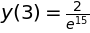

In [62]:
C1=Symbol('C1')
y3 = z.subs({C1:2, x:3})
y3

In [63]:
y3.evalf(10)

In [64]:
y3.rhs

In [65]:
y3.rhs.evalf(10)

In [66]:
z.rhs.subs({C1:2, x:4}).evalf(10)

In [67]:
z.rhs.subs({C1:2, x:5}).evalf(10)

In [68]:
type(z.rhs.subs({C1:2, x:5}).evalf(10))

sympy.core.numbers.Float

At times, `dsolve` may return too general a solution. One example is when there is a possibility that some coefficients may be complex. If we know that, for example, they are always real and positive, we can provide `dsolve` this information to avoid the solution becoming unnecessarily complicated:

In [69]:
from sympy import *
a, x = symbols('a,x')
f = Function('f')
dsolve(Derivative(f(x), x, 2) + a**4*f(x), f(x))

In [70]:
a = Symbol('a',real=True,positive=True)
dsolve(Derivative(f(x), x, 2)+a**4*f(x), f(x))

### Series expansions and plotting

It is possible to expand many SymPy expressions as Taylor series. The `series` method makes this straightforward. At minimum, we must specify the expression and the variable in which to expand it. Optionally, we can also specify the point around which to expand, the maximum term number, and the direction of the expansion (try `help(Basic.series)` for more information).

In [71]:
from sympy import *
x = Symbol('x')
sin(x).series(x, 0)

In [72]:
series(sin(x), x, 0)

In [73]:
# NBVAL_IGNORE_OUTPUT
cos(x).series(x, 0.5, 10)

In some cases, especially for numerical evaluation and plotting the results, it is necessary to remove the trailing `O(n)` term:

In [74]:
# NBVAL_IGNORE_OUTPUT
cos(x).series(x, 0.5, 10).removeO()

SymPy provides two inbuilt plotting functions, `Plot()` from the `sympy.plotting` module, and `plot` from `sympy.mpmath.visualization`. At the time of writing, these functions lack the ability to add a key to the plot, which means they are unsuitable for most of our needs. Should you wish to use them nevertheless, their `help()` text is useful.

For most of our purposes, Matplotlib should be the plotting tool of choice. The details are in chapter \[cha:visualisingdata\]. Here we furnish just one example of how to plot the results of a SymPy computation.

In [75]:
%matplotlib inline

In [76]:
from sympy import sin,series,Symbol
import pylab
x = Symbol('x')
s10 = sin(x).series(x,0,10).removeO()
s20 = sin(x).series(x,0,20).removeO()
s = sin(x)
xx = []
y10 = []
y20 = []
y = []
for i in range(1000):
  xx.append(i / 100.0)
  y10.append(float(s10.subs({x:i/100.0})))
  y20.append(float(s20.subs({x:i/100.0})))
  y.append(float(s.subs({x:i/100.0})))

pylab.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

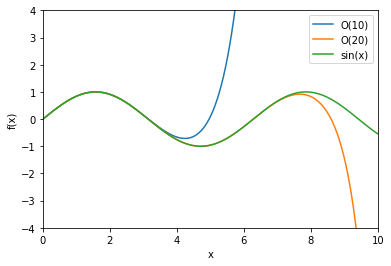

In [77]:
pylab.plot(xx, y10, label='O(10)')
pylab.plot(xx, y20, label='O(20)')
pylab.plot(xx, y, label='sin(x)')

pylab.axis([0, 10, -4, 4])
pylab.xlabel('x')
pylab.ylabel('f(x)')

pylab.legend()

### Linear equations and matrix inversion

SymPy has a `Matrix` class and associated functions that allow the symbolic solution of systems of linear equations (and, of course, we can obtain numerical answers with `subs()` and `evalf()`). We shall consider the example of the following simple pair of linear equations:

$$\begin{aligned}
3x + 7y&= 12z\\
4x - 2y&= 5z\end{aligned}$$

 We may write this system in the form $A\vec{x}=\vec{b}$ (multiply *A* by $\vec{x}$ if you want to verify that we recover the original equations), where

$$A=\left(\begin{array}{cc}
3 & 7\\
4 & -2 \end{array} \right),\qquad
\vec{x}=\left(\begin{array}{c}
x\\
y \end{array}\right),\qquad
\vec{b}=\left( \begin{array}{c}
12z\\
5z \end{array}\right).$$

Here we included a symbol, *z*, on the right-hand side to demonstrate that symbols will be propagated into the solution. In many cases we would have *z* = 1, but there may still be benefit to using SymPy over a numerical solver even when the solution contains no symbols because of its ability to return exact fractions rather than approximate `float`s.

One strategy to solve for $\vec{x}$ is to invert the matrix *A* and pre-multiply, *i.e.* $A^{-1}A\vec{x}=\vec{x}=A^{-1}\vec{b}$. SymPy’s `Matrix` class has an `inv()` method that allows us to find the inverse, and `*` performs matrix multiplication for us, when appropriate:

In [78]:
from sympy import symbols,Matrix
x, y, z = symbols('x,y,z')
A = Matrix(([3, 7], [4, -2]))
A

⎡3  7 ⎤
⎢     ⎥
⎣4  -2⎦

In [79]:
A.inv()

⎡1/17  7/34 ⎤
⎢           ⎥
⎣2/17  -3/34⎦

In [80]:
b = Matrix(( 12*z,5*z  ))
b

⎡12⋅z⎤
⎢    ⎥
⎣5⋅z ⎦

In [81]:
x = A.inv()*b
x

⎡59⋅z⎤
⎢────⎥
⎢ 34 ⎥
⎢    ⎥
⎢33⋅z⎥
⎢────⎥
⎣ 34 ⎦

In [82]:
x.subs({z:3.3}).evalf(4)

⎡5.726⎤
⎢     ⎥
⎣3.203⎦

In [83]:
type(x)

sympy.matrices.dense.MutableDenseMatrix

An alternative method of solving the same problem is to construct the system as a matrix in augmented form; that is the form obtained by appending the columns of (in our example) *A* and $\vec{b}$ together. The augmented matrix is[1]:

$$(A|\vec{b})=\left(\begin{array}{cc|c}
3 & 7 & 12z\\
4 & -2 & 5z\end{array} \right),$$

 and as before we construct this as a SymPy `Matrix` object, but in this case we pass it to the `solve_linear_system()` function:

In [84]:
from sympy import Matrix, symbols, solve_linear_system
x, y, z = symbols('x,y,z')
system = Matrix(([3, 7, 12*z],[4, -2, 5*z]))
system

⎡3  7   12⋅z⎤
⎢           ⎥
⎣4  -2  5⋅z ⎦

In [85]:
sol = solve_linear_system(system,x,y)
sol

In [86]:
type(sol)

dict

In [87]:
# NBVAL_IGNORE_OUTPUT
for k in sol.keys():
    print(k,'=',sol[k].subs({z:3.3}).evalf(4))

x = 5.726
y = 3.203


A third option is the `solve()` method, whose arguments include the individual symbolic equations, rather than any matrices. Like `dsolve()` (see [ODEs](#Ordinary-differential-equations)), `solve()` expects either expressions which it will assume equal to zero, or `Equality` objects, which we can conveniently create with `Eq()`:

In [88]:
from sympy import symbols,solve,Eq
x, y, z = symbols('x,y,z')
solve((Eq(3*x+7*y,12*z), Eq(4*x-2*y,5*z)), x, y)

In [89]:
solve((3*x+7*y-12*z, 4*x-2*y-5*z), x, y)

For more information, see `help(solve)` and `help(solve_linear_system)`.

### Non linear equations

Let’s solve a simple equation such as
$x = x^2$. There are two obvious solutions: *x* = 0 and *x* = 1. How can we ask Sympy to compute these for us?

In [90]:
import sympy
x, y, z = sympy.symbols('x, y, z')        # create some symbols
eq = x - x ** 2                           # define the equation

In [91]:
sympy.solve(eq, x)                        # solve eq = 0

The `solve()` function expects an expression that as meant to be solve so that it evaluates to zero. For our example, we rewrite

*x* = *x*<sup>2</sup>
 as
*x* − *x*<sup>2</sup> = 0
 and then pass this to the solve function.

Let’s repeat the same for the equation:
*x* = *x*<sup>3</sup>
 and solve

In [92]:
eq = x - x ** 3                           # define the equation
sympy.solve(eq, x)                        # solve eq = 0

### Output: LaTeX interface and pretty-printing

As is the case with many computer algebra systems, SymPy has the ability to format its output as LaTeX code, for easy inclusion into documents.

At the start of this chapter, we called:

```python
sympy.init_printing()
```

Sympy detected that it was in Jupyter, and enabled Latex output. The Jupyter Notebook supports (some) Latex, so this gives us the nicely formatted output above.

We can also see the plain text output from Sympy, and the raw Latex code it creates:

In [93]:
print(series(1/(x+y), y, 0, 3))

y**2/x**3 - y/x**2 + 1/x + O(y**3)


In [94]:
print(latex(series(1/(x+y), y, 0, 3)))

\frac{y^{2}}{x^{3}} - \frac{y}{x^{2}} + \frac{1}{x} + O\left(y^{3}\right)


In [95]:
print(latex(series(1/(x+y), y, 0, 3), mode='inline'))

$\frac{y^{2}}{x^{3}} - \frac{y}{x^{2}} + 1 / x + O\left(y^{3}\right)$


Be aware that in its default mode, `latex()` outputs code that requires the `amsmath` package to be loaded via a `\backslashusepackage{amsmath}` command in the document preamble.

SymPy also supports a “pretty print” (`pprint()`) output routine, which produces better-formatted text output than the default printing routine, as illustrated below. Note features such as the subscripts for array elements whose names are of the form `T_n`, the italicised constant *e*, vertically-centred dots for multiplication, and the nicely-formed matrix borders and fractions.

<img src="static/images/sympy.png" alt="Nicely-formatted output from pprint()." style="width:60.0%" />

Finally, SymPy offers `preview()`, which displays rendered output on screen (check `help(preview)` for details).


### Automatic generation of C code

A strong point of many symbolic libraries is that they can convert the symbolic expressions to C-code (or other code) that can subsequently be compiled for high execution speed. Here is an example that demonstrates this:

In [96]:
from sympy import *                                                                                    
from sympy.utilities.codegen import codegen                                                                            
x = Symbol('x')                                                                                                          
sin(x).series(x, 0, 6)

In [97]:
# NBVAL_IGNORE_OUTPUT
print(codegen(("taylor_sine",sin(x).series(x,0,6)), language='C')[0][1])

/******************************************************************************
 *                       Code generated with sympy 1.2                        *
 *                                                                            *
 *              See http://www.sympy.org/ for more information.               *
 *                                                                            *
 *                       This file is part of 'project'                       *
 ******************************************************************************/
#include "taylor_sine.h"
#include <math.h>

double taylor_sine(double x) {

   double taylor_sine_result;
   taylor_sine_result = x - 1.0/6.0*pow(x, 3) + (1.0/120.0)*pow(x, 5) + O(x**6);
   return taylor_sine_result;

}



Related tools
-------------

It is worth noting that the SAGE initiative <http://www.sagemath.org/> is trying to “create a viable free open source alternative to Magma, Maple, Mathematica and Matlab.” and includes the SymPy library among many others. Its symbolic capabilities are more powerful than SymPy’s, and SAGE, but the SymPy features will already cover many of the needs arising in science and engineering. SAGE includes the computer algebra system Maxima, which is also available standalone from <http://maxima.sourceforge.net/>.